#### Importing all required libraries

In [789]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
import math
from scipy import stats

#### To display all rows and columns in DF

In [790]:
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 25)

# white Background for sns

ax = sns.axes_style(style="white", rc=None)

#### Import and view Data

In [791]:
house_df = pd.read_csv(r'Craiglist_HouseData3.csv', index_col=0)
house_df

Price Bedroom        Area  \
1              nan     NaN         nan   
2      1324888.000       7    7771.000   
3       728000.000       1     547.000   
4      1098800.000       6     547.000   
5       632000.000       2    1305.000   
6       648000.000       1     771.000   
7      1099000.000       2      11.000   
8       548000.000       1     560.000   
9       599900.000       2         nan   
10      790000.000       2     617.000   
11      468000.000       1     530.000   
12      790000.000       1    1300.000   
13      695000.000       6     679.000   
14     1499000.000       2     186.000   
15      369999.000       1       5.000   
16     1849000.000       2       1.000   
17     3298000.000       5    5387.000   
18     5350000.000       8    5630.000   
19     2088000.000       8     357.000   
20     4188000.000       6    5655.000   
21      615000.000       3         nan   
22             nan     NaN         nan   
23      720000.000       4    1900.000   
24      639000.000       2         nan   
25     1349000.000       7    3394.000   
26             nan     NaN         nan   
27     1450000.000       5    3470.000   
28             nan       r    7566.000   
29     1400000.000       6   51000.000   
30     2216000.000       7       4.000   
31      774800.000       1     909.000   
32             nan     NaN         nan   
33      999000.000       3       1.000   
34        2600.000       4         nan   
35      485000.000       2     895.000   
36      649888.000       1     533.000   
37     2199000.000       4    3784.000   
38     1358000.000       4    1960.000   
39     1049000.000       6      39.000   
40             nan       0    3000.000   
41      579900.000       3    1538.000   
42      279900.000       1     678.000   
43        5995.000       3    3000.000   
44      370000.000       5    3606.000   
45             nan       r       1.000   
46      125000.000       1    1300.000   
47       65999.000       3       1.000   
48      538500.000       1     790.000   
49      348000.000       2     880.000   
50      348000.000       2     880.000   
51     1550000.000       3         nan   
52     2000000.000     NaN         nan   
53      698000.000       2     969.000   
54      578888.000       3    1377.000   
55     2535000.000       4         nan   
56      366000.000       3    1100.000   
57     2598000.000       4    6007.000   
58     5198000.000       2         nan   
59      849000.000       2     780.000   
60      474900.000       2    1180.000   
61     1468000.000       4    1919.000   
62     2999000.000       4    1919.000   
63     2999000.000       4    1919.000   
64     2999000.000       4    1919.000   
65     2999000.000       4    3800.000   
66        1400.000       1     566.000   
67      850000.000       3     566.000   
68      423000.000       4     471.000   
69      825000.000       2    1177.000   
70      729000.000       2     815.000   
71     1188000.000       3       1.000   
72             nan     NaN         nan   
73      839800.000     NaN         nan   
74      105000.000       2     600.000   
75     3970000.000       3    3003.000   
76      938000.000       2     919.000   
77     3690000.000       5    4178.000   
78     4628000.000       5    5001.000   
79             nan     NaN         nan   
80      399900.000       2       8.000   
81     1240000.000       7    3600.000   
82      820000.000       2       9.000   
83     1100000.000       4    1875.000   
84           1.000     NaN         nan   
85           1.000     NaN         nan   
86           1.000     NaN         nan   
87           1.000     NaN         nan   
88             nan     NaN         nan   
89             nan     NaN         nan   
90           1.000       5    5000.000   
91       65999.000       3       1.000   
92     1588000.000       6       1.000   
93             nan       r    7771.000   
94             nan     NaN         nan   
95     1499999.000     

In [792]:
"We have {} rows and {} columns scraped from Craigslist".format(house_df.shape[0],house_df.shape[1])

'We have 2788 rows and 11 columns scraped from Craigslist'

#### how many null values do we have in each column ?

In [793]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 1 to 2788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         2600 non-null   float64
 1   Bedroom       2467 non-null   object 
 2   Area          2026 non-null   float64
 3   Title         2788 non-null   object 
 4   Place         2682 non-null   object 
 5   Post Timing   2788 non-null   object 
 6   Finishing     2788 non-null   object 
 7   House Type    2719 non-null   object 
 8   Parking Type  1101 non-null   object 
 9   Bathroom      2784 non-null   object 
 10  Link          2788 non-null   object 
dtypes: float64(2), object(9)
memory usage: 261.4+ KB


#### Remove invalid rows

In [794]:
#-- Remove house rental posts 
house_df.drop(house_df[house_df['Title'].str.contains("rent")].index, inplace=True)
house_df.drop(house_df[house_df['Title'].str.contains("Rent")].index, inplace=True)
#-- Remove Duplicate rows
house_df.drop_duplicates(subset = ["Title", "Area", "Place", "Finishing", "Bedroom","House Type"], inplace=True) 

"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 2388'

In [795]:
#-- Remove land/plot sale posts
house_df.drop(house_df[house_df['House Type']=='land'].index, inplace=True)

land_index = house_df[((house_df['Title'].str.contains("Land") | 
           house_df['Title'].str.contains("land")) & (house_df["Bedroom"].isnull()))].index
house_df.drop(land_index, axis=0, inplace=True)

acre_index = house_df[((house_df['Title'].str.contains("acre") | 
           house_df['Title'].str.contains("Acre")) & (house_df["Bedroom"].isnull()))].index
house_df.drop(acre_index, axis=0, inplace=True)

"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 2243'

In [796]:
house_df.dropna(subset = ["Price"], inplace=True)
"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 2105'

#### Handling null values 

In [797]:
# Drop null values and 0 - priced 

house_df = house_df[house_df["Price"]>1]

"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 2084'

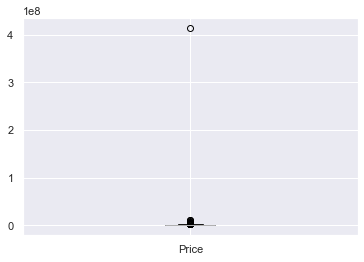

In [798]:
house_df.boxplot(column='Price')


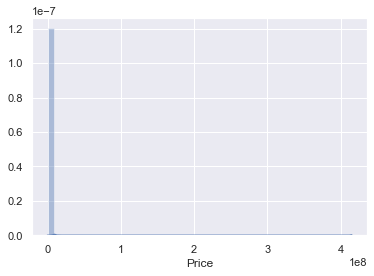

In [799]:
ax = sns.distplot( house_df["Price"])

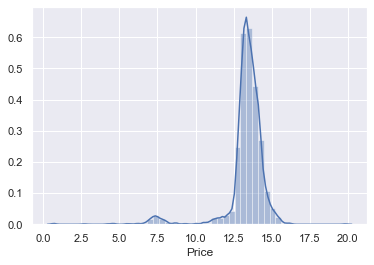

In [800]:
ax = sns.distplot( np.log(house_df["Price"]))

#### Remove outliers

In [801]:
# normalise the price
house_df["Price"] = np.log(house_df["Price"])

D:\ProgramFiles\AnacondaDistribution\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [802]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [803]:
house_df = remove_outlier(house_df, "Price")


"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 1923'

In [804]:
print('Bedroom unique values -', house_df['Bedroom'].unique(),'\n')
print('Bathroom unique values -', house_df['Bathroom'].unique(),'\n')
print('House Type -', house_df['House Type'].unique(),'\n')
print('Parking Type -', house_df['Parking Type'].unique(),'\n')
print('Finishing -', house_df['Finishing'].unique(),'\n')

Bedroom unique values - ['7' '1' '6' '2' '5' '8' '3' '4' nan '9' '0'] 

Bathroom unique values - ['1' '4.5' '2' '0' '5' '6' '3' '4' '3.5' '2.5' '6.5' '7' '1.5' 'shared'
 '9+' '5.5' '8' '7.5' nan] 

House Type - ['house' 'apartment' 'condo' 'townhouse' nan 'duplex'] 

Parking Type - [nan 'attached garage' 'detached garage' 'street parking' 'no parking'] 

Finishing - ['unfurnished' 'furnished'] 



#### House Type

In [805]:
# Considering missing values as a category
house_df["House Type"].fillna("others", inplace=True)

#### Bathroom

In [806]:
print("All the categories 9: '9+', 'shared', 'split', '0','5.5','6','7','7.5','8'  --- "+ str(house_df[(house_df['Bathroom']== "9+") 
                                                                       |(house_df['Bathroom']== "shared")
                                                                       |(house_df['Bathroom']== "split")
                                                                       |(house_df['Bathroom']=="0")
                                                                       |(house_df['Bathroom']=="5.5")
                                                                       |(house_df['Bathroom']=="6")
                                                                       |(house_df['Bathroom']=="7")
                                                                       |(house_df['Bathroom']=="7.5")
                                                                       |(house_df['Bathroom']=="8")].shape[0])," rows")

print("Out of all rows - ",round(63/house_df.shape[0],2)*100, "%")

All the categories 9: '9+', 'shared', 'split', '0','5.5','6','7','7.5','8'  --- 63  rows
Out of all rows -  3.0 %


In [807]:
#bathroom fillna with groupby(House Type)
house_df['Bathroom'].loc[((house_df['Bathroom']== "9+") 
                                   |(house_df['Bathroom']== "shared")
                                   |(house_df['Bathroom']== "split")
                                   |(house_df['Bathroom']=="0")
                                   |(house_df['Bathroom']=="4")
                                   |(house_df['Bathroom']=="5.5")
                                   |(house_df['Bathroom']=="6")
                                   |(house_df['Bathroom']=="7")
                                   |(house_df['Bathroom']=="7.5")
                                   |(house_df['Bathroom']=="8"))] = np.nan
house_df['Bathroom'] = pd.to_numeric(house_df['Bathroom'], downcast='integer')
house_df['Bathroom'].loc[house_df['Bathroom']> 5] = np.nan

D:\ProgramFiles\AnacondaDistribution\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [808]:
house_df.groupby(['House Type'])['Bathroom'].agg(pd.Series.mode)

House Type
apartment   2.000
condo       1.000
duplex      3.500
house       2.000
others      1.000
townhouse   3.000
Name: Bathroom, dtype: float64

In [809]:
house_df['Bathroom'].loc[((house_df['House Type'] == "condo")|
              (house_df['House Type'] == "others"))& (house_df['Bathroom'].isnull())] = 1
house_df['Bathroom'].loc[((house_df['House Type'] == "apartment"))& (house_df['Bathroom'].isnull())] = 2
house_df['Bathroom'].loc[((house_df['House Type'] == "townhouse"))& (house_df['Bathroom'].isnull())] = 3
house_df['Bathroom'].loc[((house_df['House Type'] == "duplex"))& (house_df['Bathroom'].isnull())] = 3.5
house_df['Bathroom'].loc[((house_df['House Type'] == "house"))& (house_df['Bathroom'].isnull())] = 2

In [810]:
house_df['Bathroom'].unique()

array([1. , 4.5, 2. , 5. , 3. , 3.5, 2.5, 1.5])

In [811]:
house_df.groupby("Bathroom").agg([ 'count']).iloc[:,0]

Bathroom
1.000    492
1.500     44
2.000    876
2.500     90
3.000    307
3.500     53
4.500     12
5.000     49
Name: (Price, count), dtype: int64

#### Parking

In [812]:
house_df[house_df['Parking Type'].notnull()].groupby(['House Type','Parking Type']).agg('count').iloc[:,0]

House Type  Parking Type   
apartment   attached garage    216
            detached garage     14
            no parking           5
            street parking      31
condo       attached garage    114
            detached garage      7
            no parking           3
            street parking      18
duplex      attached garage      7
            detached garage      8
            street parking       2
house       attached garage    190
            detached garage     63
            street parking      38
others      attached garage      5
            street parking       7
townhouse   attached garage    108
            detached garage      9
            street parking       5
Name: Price, dtype: int64

In [813]:
house_df['Parking Type'].fillna('attached garage', inplace=True)

In [814]:
house_df['Parking Type'].isnull().sum()

0

### Finishing

In [815]:
house_df.rename({'Finishing': 'isFurnished'}, axis=1, inplace=True)  

In [816]:
house_df["isFurnished"].unique()

array(['unfurnished', 'furnished'], dtype=object)

In [817]:
house_df["isFurnished"].replace({'unfurnished':0, 'furnished':1}, inplace=True)

### Bedroom

In [818]:
house_df.groupby(['House Type'])['Bedroom'].agg(pd.Series.mode)

House Type
apartment    2
condo        2
duplex       4
house        4
others       2
townhouse    3
Name: Bedroom, dtype: object

In [819]:
house_df['Bedroom'].loc[((house_df['House Type'] == "apartment") |
              (house_df['House Type'] == "condo")|
              (house_df['House Type'] == "others"))& (house_df['Bedroom'].isnull())] = 2
house_df['Bedroom'].loc[((house_df['House Type'] == "duplex")|
                        
                        (house_df['House Type'] == "house"))& (house_df['Bedroom'].isnull())] = 4
house_df['Bedroom'].loc[((house_df['House Type'] == "townhouse"))& (house_df['Bedroom'].isnull())] = 3

In [820]:
house_df['Bedroom'] = pd.to_numeric(house_df["Bedroom"])

In [821]:
house_df[house_df['Bedroom']>5]['Bedroom'].unique()

array([7, 6, 8, 9], dtype=int64)

In [822]:
print("All the categories which are more than 5:   --- "+ str(house_df[(house_df['Bedroom']>5)].shape[0])," rows")

print("Out of all rows - ",round(140/house_df.shape[0],2)*100, "%")

All the categories which are more than 5:   --- 140  rows
Out of all rows -  7.000000000000001 %


In [823]:
house_df['Bedroom'].loc[house_df[house_df['Bedroom']>5].index] = 6

In [824]:
house_df['Bedroom'].isnull().sum()

0

### Area

In [825]:
house_df['Area'].fillna(house_df.groupby(['House Type', 'Bedroom'])['Area'].transform('mean'), inplace=True)

In [826]:
house_df.drop(house_df[house_df["Area"].isnull()].index, inplace=True)

In [827]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 2 to 2788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         1922 non-null   float64
 1   Bedroom       1922 non-null   int64  
 2   Area          1922 non-null   float64
 3   Title         1922 non-null   object 
 4   Place         1887 non-null   object 
 5   Post Timing   1922 non-null   object 
 6   isFurnished   1922 non-null   int64  
 7   House Type    1922 non-null   object 
 8   Parking Type  1922 non-null   object 
 9   Bathroom      1922 non-null   float64
 10  Link          1922 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 180.2+ KB


In [828]:
house_df['Area'] = pd.to_numeric(house_df['Area'],downcast="integer")

In [829]:
house_df["Area"].isnull().sum()

0

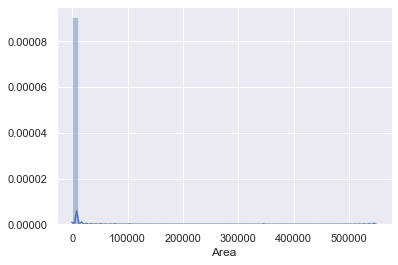

In [830]:
ax = sns.distplot( house_df["Area"])

In [831]:
house_df["Area"] = np.log(house_df["Area"])
house_df.drop(house_df[house_df['Area']<0].index, inplace=True)

D:\ProgramFiles\AnacondaDistribution\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


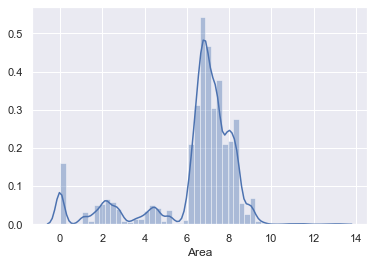

In [832]:
ax = sns.distplot(house_df["Area"])

In [833]:
house_df = remove_outlier(house_df, "Area")


"Remaining Rows - " + str(house_df.shape[0])

'Remaining Rows - 1590'

#### Columns

In [834]:
#-- Remove columns
col_remove = ["Title", "Place", "Post Timing", "Link"]
house_df.drop(col_remove, axis= 1, inplace =True)

In [835]:
house_df.head()#check isfurnished

Price  Bedroom  Area  isFurnished House Type     Parking Type  Bathroom
2 14.097        6 8.958            0      house  attached garage     1.000
3 13.498        1 6.304            0  apartment  attached garage     1.000
4 13.910        6 6.304            0  apartment  attached garage     4.500
5 13.357        2 7.174            0      condo  attached garage     2.000
6 13.382        1 6.648            0      condo  attached garage     1.000

In [836]:
house_df.shape

(1590, 7)

In [837]:
print('Bedroom unique values -', house_df['Bedroom'].unique(),'\n')
print('Bathroom unique values -', house_df['Bathroom'].unique(),'\n')
print('House Type -', house_df['House Type'].unique(),'\n')
print('Parking Type -', house_df['Parking Type'].unique(),'\n')
print('Finishing -', house_df['isFurnished'].unique(),'\n')

Bedroom unique values - [6 1 2 5 3 4 0] 

Bathroom unique values - [1.  4.5 2.  5.  3.  3.5 2.5 1.5] 

House Type - ['house' 'apartment' 'condo' 'townhouse' 'duplex' 'others'] 

Parking Type - ['attached garage' 'detached garage' 'street parking' 'no parking'] 

Finishing - [0 1] 



In [838]:
final_df = pd.get_dummies(house_df, drop_first=True)

In [839]:
final_df


Price  Bedroom  Area  isFurnished  Bathroom  House Type_condo  \
2    14.097        6 8.958            0     1.000                 0   
3    13.498        1 6.304            0     1.000                 0   
4    13.910        6 6.304            0     4.500                 0   
5    13.357        2 7.174            0     2.000                 1   
6    13.382        1 6.648            0     1.000                 1   
8    13.214        1 6.328            0     1.000                 1   
9    13.305        2 7.987            0     1.000                 0   
10   13.580        2 6.425            0     1.000                 1   
11   13.056        1 6.273            0     1.000                 0   
12   13.580        1 7.170            0     1.000                 0   
13   13.452        6 6.521            0     1.000                 0   
14   14.220        2 5.226            0     2.000                 1   
17   15.009        5 8.592            0     5.000                 0   
19   14.552        6 5.878            0     2.000                 0   
21   13.329        3 7.416            0     3.000                 0   
23   13.487        4 7.550            0     3.000                 0   
24   13.368        2 7.987            0     3.000                 0   
27   14.187        5 8.152            0     5.000                 0   
31   13.560        1 6.812            0     2.000                 0   
35   13.092        2 6.797            0     1.000                 0   
36   13.385        1 6.279            0     1.000                 0   
37   14.604        4 8.239            0     2.000                 0   
38   14.122        4 7.581            0     3.500                 0   
41   13.271        3 7.338            0     2.500                 0   
42   12.542        1 6.519            0     1.000                 0   
44   12.821        5 8.190            0     2.000                 0   
48   13.197        1 6.672            0     1.000                 0   
49   12.760        2 6.780            0     1.000                 1   
51   14.254        3 6.980            0     3.500                 1   
53   13.456        2 6.876            0     2.000                 1   
54   13.269        3 7.228            0     3.000                 0   
55   14.746        4 7.867            0     2.000                 0   
56   12.810        3 7.003            0     1.000                 0   
57   14.770        4 8.701            0     2.000                 0   
59   13.652        2 6.659            0     2.000                 0   
60   13.071        2 7.073            0     2.000                 0   
61   14.199        4 7.560            0     2.000                 0   
62   14.914        4 7.560            0     3.000                 0   
65   14.914        4 8.243            0     3.000                 0   
67   13.653        3 6.339            0     1.000                 0   
68   12.955        4 6.155            0     1.000                 1   
69   13.623        2 7.071            0     3.000                 0   
70   13.499        2 6.703            0     1.000                 0   
73   13.641        3 7.029            0     3.000                 0   
76   13.752        2 6.823            0     2.000                 1   
77   15.121        5 8.338            0     5.000                 0   
81   14.031        6 8.189            0     5.000                 0   
83   13.911        4 7.536            0     2.000                 0   
95   14.221        6 8.328            0     2.000                 0   
97   13.892        2 7.015            0     2.000                 0   
98   13.801        1 7.056            0     2.000                 0   
106  14.221        4 7.867            0     2.000                 0   
107  13.437        2 6.660            0     2.000                 1   
108  14.334        4 7.260            0     3.000                 0   
109  14.455        2 7.072            0     1.000                 0   
110  13.443        1 6.397    

### Linear Regression

In [841]:
X = final_df.iloc[:, 1:]
y = final_df.iloc[:, 0]

In [842]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [843]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [844]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [845]:
print(lin_reg.intercept_)

12.592128988553556


In [846]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Bedroom                             0.068
Area                                0.059
isFurnished                        -0.189
Bathroom                            0.139
House Type_condo                   -0.117
House Type_duplex                   0.236
House Type_house                    0.309
House Type_others                  -0.480
House Type_townhouse               -0.072
Parking Type_detached garage       -0.035
Parking Type_no parking             0.054
Parking Type_street parking        -0.241

In [847]:
pred = lin_reg.predict(X_test)

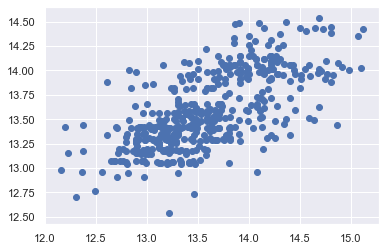

In [848]:
plt.scatter(y_test, pred)

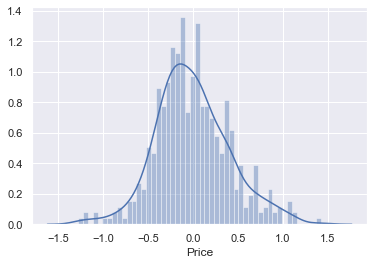

In [849]:
sns.distplot((y_test - pred), bins=50);

In [850]:


print_evaluate(y_test, lin_reg.predict(X_test))



MAE: 0.31654409035502357
MSE: 0.16648179666938817
RMSE: 0.40802180906097185
R2 Square 0.46523335232893726


In [851]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Model   MAE   MSE  RMSE  R2 Square  Cross Validation
0  Linear Regression 0.317 0.166 0.408      0.465             0.430

In [852]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [853]:
with open('lin_reg6.pkl','wb') as f:
    pickle.dump(lin_reg,f)